In [1]:
# Set seeds for reproducibility
import random
random.seed(0)

import numpy as np
np.random.seed(0)

import tensorflow as tf
tf.random.set_seed(0)

**Importing the dependencies**

In [2]:
import os
import json
from zipfile import ZipFile
from PIL import Image

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
import tensorflow as tf

In [3]:
!pip install kaggle

In [4]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("kritikseth/fruit-and-vegetable-image-recognition")

print("Path to dataset files:", path)

100%|██████████| 1.98G/1.98G [00:19<00:00, 107MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/kritikseth/fruit-and-vegetable-image-recognition/versions/8


In [5]:
print(os.listdir("/root/.cache/kagglehub/datasets/kritikseth/fruit-and-vegetable-image-recognition/versions/8"))


print(len(os.listdir("/root/.cache/kagglehub/datasets/kritikseth/fruit-and-vegetable-image-recognition/versions/8/train")))
print(os.listdir("/root/.cache/kagglehub/datasets/kritikseth/fruit-and-vegetable-image-recognition/versions/8/train")[:5])


['train', 'test', 'validation']
36
['mango', 'jalepeno', 'orange', 'onion', 'apple']


**Number of Classes = 38**

In [6]:
print(len(os.listdir("/root/.cache/kagglehub/datasets/kritikseth/fruit-and-vegetable-image-recognition/versions/8/train/apple")))
print(os.listdir("/root/.cache/kagglehub/datasets/kritikseth/fruit-and-vegetable-image-recognition/versions/8/train/apple")[:5])

68
['Image_21.jpg', 'Image_3.jpg', 'Image_58.jpg', 'Image_62.jpg', 'Image_9.jpg']


In [7]:
# Dataset Path
train_dir = '/root/.cache/kagglehub/datasets/kritikseth/fruit-and-vegetable-image-recognition/versions/8/train'
valid_dir = '/root/.cache/kagglehub/datasets/kritikseth/fruit-and-vegetable-image-recognition/versions/8/validation'

(960, 1018, 3)


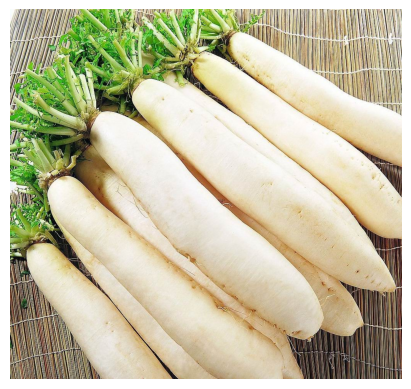

In [11]:
image_path = '/root/.cache/kagglehub/datasets/kritikseth/fruit-and-vegetable-image-recognition/versions/8/train/raddish/Image_100.jpg'

# Read the image
img = mpimg.imread(image_path)

print(img.shape)
# Display the image
plt.imshow(img)
plt.axis('off')  # Turn off axis numbers
plt.show()

##  MobileNetV2

In [45]:

from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout,Flatten
from tensorflow.keras.models import Model
import tensorflow
from tensorflow import keras
from keras.models import Sequential,load_model,Model
from keras.layers import Conv2D,MaxPool2D,AveragePooling2D,Dense,Flatten,ZeroPadding2D,BatchNormalization,Activation,Add,Input,Dropout,GlobalAveragePooling2D
from keras.optimizers import SGD
from keras.initializers import glorot_uniform

from keras.callbacks import ModelCheckpoint,EarlyStopping,ReduceLROnPlateau

In [46]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input

In [61]:
base_model = MobileNetV2(include_top=False, weights='imagenet', input_shape=(128, 128, 3))
base_model.trainable = False

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [62]:
#Image augmentation
train_datagen= ImageDataGenerator(shear_range=0.2,zoom_range=0.2,horizontal_flip=False,vertical_flip=False
                                  ,fill_mode='nearest',width_shift_range=0.2,height_shift_range=0.2)

val_datagen=ImageDataGenerator()



path_train='/root/.cache/kagglehub/datasets/kritikseth/fruit-and-vegetable-image-recognition/versions/8/train'

path_valid='/root/.cache/kagglehub/datasets/kritikseth/fruit-and-vegetable-image-recognition/versions/8/validation'

train= train_datagen.flow_from_directory(directory=path_train,batch_size=32,target_size=(128,128),
                                         class_mode='categorical',seed=42)

valid=val_datagen.flow_from_directory(directory=path_valid,batch_size=32,target_size=(128,128),class_mode='categorical')

Found 3115 images belonging to 36 classes.
Found 351 images belonging to 36 classes.


In [64]:

x = tf.keras.Input(shape=(128, 128, 3))
y = preprocess_input(x)
y = base_model(y, training=False)
y = GlobalAveragePooling2D()(y)
#y = Dense(512, activation='relu')(y)

y = Dense(128, activation='relu')(y)
y = Dense(64,  activation='relu')(y)
y = Dropout(0.3)(y)
y = Dense(36, activation='softmax')(y)

mobilenet_model = Model(inputs=x, outputs=y)
mobilenet_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [65]:
mobilenet = mobilenet_model.fit(train, validation_data=valid, epochs=20)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20


/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


98/98 ━━━━━━━━━━━━━━━━━━━━ 108s 1s/step - accuracy: 0.1723 - loss: 3.2098 - val_accuracy: 0.7265 - val_loss: 1.2042
Epoch 2/20
98/98 ━━━━━━━━━━━━━━━━━━━━ 94s 965ms/step - accuracy: 0.5648 - loss: 1.5494 - val_accuracy: 0.8148 - val_loss: 0.6600
Epoch 3/20
98/98 ━━━━━━━━━━━━━━━━━━━━ 87s 889ms/step - accuracy: 0.6703 - loss: 1.1527 - val_accuracy: 0.8490 - val_loss: 0.4980
Epoch 4/20
98/98 ━━━━━━━━━━━━━━━━━━━━ 89s 905ms/step - accuracy: 0.7192 - loss: 0.9184 - val_accuracy: 0.8775 - val_loss: 0.4085
Epoch 5/20
98/98 ━━━━━━━━━━━━━━━━━━━━ 91s 919ms/step - accuracy: 0.7507 - loss: 0.8227 - val_accuracy: 0.8889 - val_loss: 0.3835
Epoch 6/20
98/98 ━━━━━━━━━━━━━━━━━━━━ 139s 897ms/step - accuracy: 0.7819 - loss: 0.7160 - val_accuracy: 0.8946 - val_loss: 0.3521
Epoch 7/20
98/98 ━━━━━━━━━━━━━━━━━━━━ 89s 913ms/step - accuracy: 0.7997 - loss: 0.6494 - val_accuracy: 0.9003 - val_loss: 0.3209
Epoch 8/20
98/98 ━━━━━━━━━━━━━━━━━━━━ 142s 908ms/step - accuracy: 0.8170 - loss: 0.6015 - val_accuracy: 0.894

In [66]:
# Model Evaluation
print("Evaluating model...")
val_loss, val_accuracy = mobilenet_model.evaluate(valid, steps=valid.samples // 32)
print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")

Evaluating model...
10/10 ━━━━━━━━━━━━━━━━━━━━ 9s 873ms/step - accuracy: 0.9027 - loss: 0.3660
Validation Accuracy: 91.87%


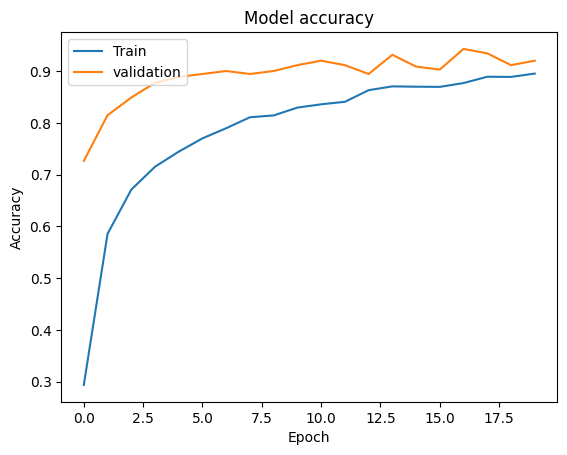

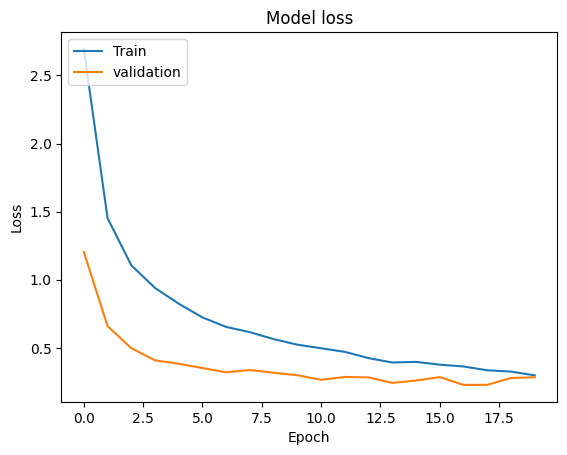

In [67]:
# Plot training & validation accuracy values
plt.plot(mobilenet.history['accuracy'])
plt.plot(mobilenet.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(mobilenet.history['loss'])
plt.plot(mobilenet.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'validation'], loc='upper left')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


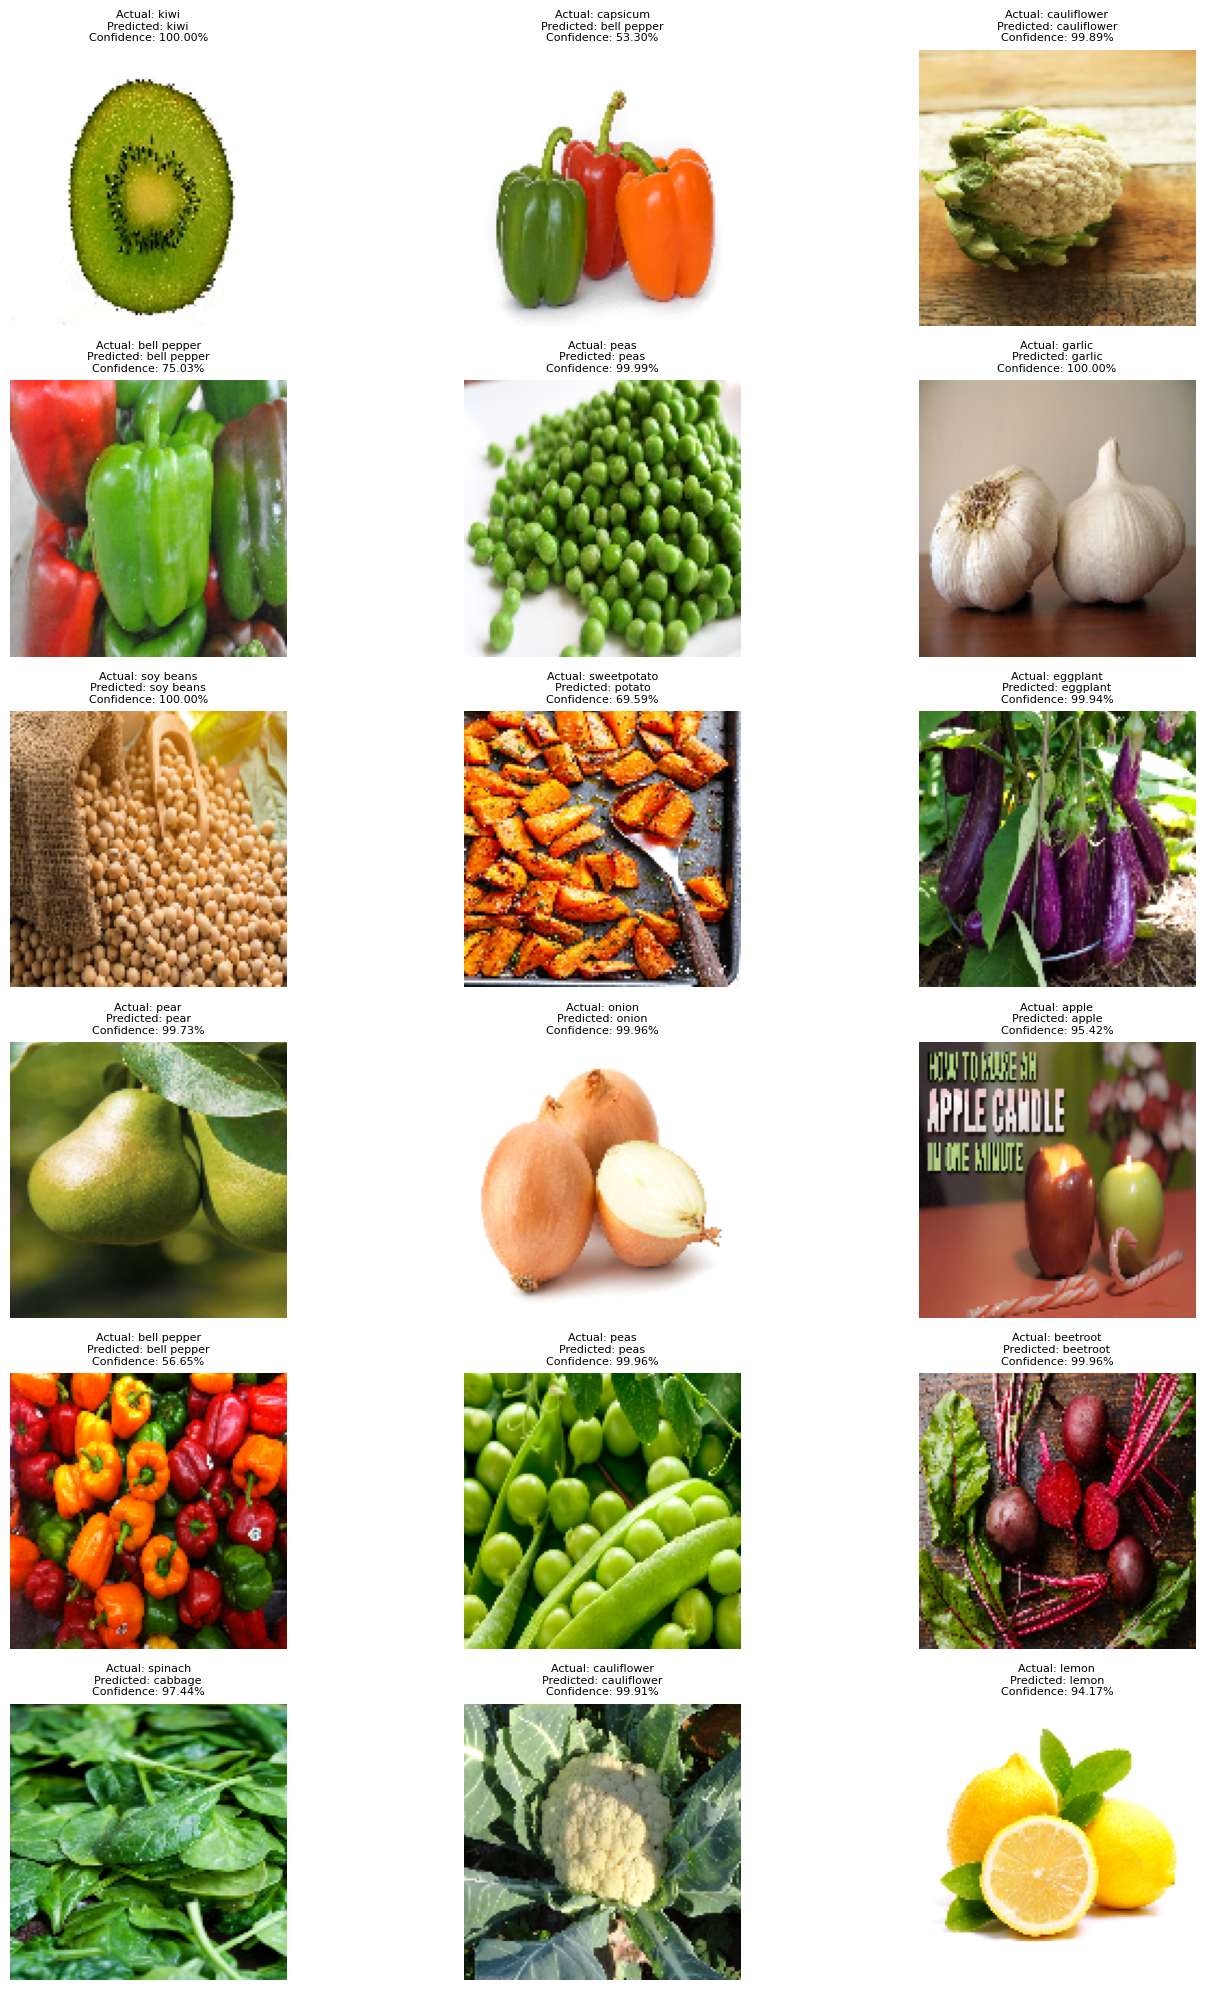

In [68]:
# Get class names from the generator
class_indices = train.class_indices
class_names = {v: k for k, v in class_indices.items()}  # Invert the dictionary

# Collect predictions for 18 images
num_images = 18
images_list = []
actual_labels = []
predicted_labels = []
confidence_scores = []

# Iterate through validation generator to collect 18 images
count = 0
for images_batch, labels_batch in valid:
    batch_predictions = mobilenet_model.predict(images_batch)

    for i in range(len(images_batch)):
        if count >= num_images:
            break

        # Process image
        img = images_batch[i]
        if img.max() <= 1:
            img = (img * 255).astype('uint8')
        else:
            img = img.astype('uint8')

        # Get labels and confidence
        actual_label_idx = np.argmax(labels_batch[i])
        predicted_label_idx = np.argmax(batch_predictions[i])
        confidence = np.max(batch_predictions[i]) * 100  # Convert to percentage

        # Store data
        images_list.append(img)
        actual_labels.append(class_names[actual_label_idx])
        predicted_labels.append(class_names[predicted_label_idx])
        confidence_scores.append(confidence)

        count += 1

    if count >= num_images:
        break

# Create subplot
plt.figure(figsize=(15, 20))  # Adjust figure size as needed
for i in range(num_images):
    plt.subplot(6, 3, i + 1)  # 6 rows, 3 columns
    plt.imshow(images_list[i])
    plt.axis('off')

    # Create title with actual label, predicted label, and confidence
    title = f"Actual: {actual_labels[i]}\nPredicted: {predicted_labels[i]}\nConfidence: {confidence_scores[i]:.2f}%"
    plt.title(title, fontsize=8)

plt.tight_layout()
plt.show()

In [70]:
from sklearn.metrics import classification_report, accuracy_score

# Existing code
y_true = []
y_pred = []

for i in range(len(valid)):
    images, labels = valid[i]
    preds = mobilenet_model.predict(images)

    y_true.extend(np.argmax(labels, axis=1))
    y_pred.extend(np.argmax(preds, axis=1))

# Classification Report
report = classification_report(y_true, y_pred, target_names=list(class_names.values()))
print(report)

# Accuracy Score
accuracy = accuracy_score(y_true, y_pred)
print(f"\nOverall Accuracy: {accuracy * 100:.2f}%")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
               precision    recall  f1-score   support

        apple       0.88      0.70      0.78        10
       banana       1.00      0.89      0.94         9
     beetroot       0.91      1.00      0.95        10
  bell pepper       0.73      0.89      0.80         9
      cabbage       0.91      1.00      0.95        10
     capsicum       0.80      0.80      0.80        10
       carrot       1.00      0.89      0.94         9
  cauliflower       1.00      1.00      1.00        10
chilli pepper       0.89      0.89      0.89         9
         corn       0.77      1.0

In [71]:
print(" Classification Report:\n")
print(report)
print(" Overall Accuracy:", f"{accuracy * 100:.2f}%")

 Classification Report:

               precision    recall  f1-score   support

        apple       0.88      0.70      0.78        10
       banana       1.00      0.89      0.94         9
     beetroot       0.91      1.00      0.95        10
  bell pepper       0.73      0.89      0.80         9
      cabbage       0.91      1.00      0.95        10
     capsicum       0.80      0.80      0.80        10
       carrot       1.00      0.89      0.94         9
  cauliflower       1.00      1.00      1.00        10
chilli pepper       0.89      0.89      0.89         9
         corn       0.77      1.00      0.87        10
     cucumber       0.91      1.00      0.95        10
     eggplant       1.00      0.90      0.95        10
       garlic       1.00      1.00      1.00        10
       ginger       1.00      0.90      0.95        10
       grapes       1.00      0.78      0.88         9
     jalepeno       1.00      0.89      0.94         9
         kiwi       1.00      1.00     

In [74]:
 mobilenet_model.save('mobilenet.h5')


In [75]:
from google.colab import files
files.download("mobilenet.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>